In [1]:
import pandas as pd
import numpy as np
# !pip install umap-learn
import umap.umap_ as umap

from matplotlib import pyplot as plt

### Dataset analysis

In [2]:
met_df = (pd.read_csv("./metabolomics/data_zscore_comp_id.csv"))

In [3]:
met_df.head()

,Unnamed: 0,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
0,42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
2,27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
3,38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
4,437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
met_df.shape

(968, 464)

In [5]:
met_df['Unnamed: 0'].unique().shape # unnamed -> unique values, id?

(968,)

In [6]:
comp_df = pd.read_csv("./metabolomics/compAnno.csv")

In [7]:
comp_df.head()

,BIOCHEMICAL,PATHWAY_SORTORDER,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,CHEMICAL_ID,PUBCHEM,CAS,KEGG,HMDB_ID
0,S-1-pyrroline-5-carboxylate,64.0,Amino Acid,Glutamate Metabolism,42370,Pos Early,35,11966181,2906-39-0,C04322,HMDB0001301
1,spermidine,553.0,Amino Acid,Polyamine Metabolism,485,Pos Early,50,1102,124-20-9,C00315,HMDB0001257
2,1-methylnicotinamide,4336.0,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,27665,Pos Early,55,457,1005-24-9,C02918,HMDB0000699
3,"12,13-DiHOME",2048.0,Lipid,"Fatty Acid, Dihydroxy",38395,Neg,62,10236635,263399-35-5,C14829,HMDB0004705
4,5-hydroxyindoleacetate,295.0,Amino Acid,Tryptophan Metabolism,437,Neg,71,1826,54-16-0,C05635,HMDB0000763


comp_df.shape

In [8]:
comp_df['COMP_ID'].unique().shape

(963,)

In [9]:
met_df['Unnamed: 0'].unique().shape

(968,)

In [10]:
# missing ids?
missing_ids = [x for x in list(met_df['Unnamed: 0']) if x not in list(comp_df['COMP_ID'])]
missing_ids

[33967, 38595, 53189, 52896, 52897]

In [11]:
for x in missing_ids:
    print(x, met_df[met_df['Unnamed: 0'] == x].isna().sum(axis=1))

33967 963    463
dtype: int64
38595 964    463
dtype: int64
53189 965    463
dtype: int64
52896 966    463
dtype: int64
52897 967    463
dtype: int64


In [12]:
# rows with all NaN
len([x for x in met_df.isna().sum(axis=1) if x == 463])

8

In [13]:
met_df.set_index('Unnamed: 0', inplace=True)
met_df.index.name = None
met_df.head()

,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,BAYL-09006,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,0.000250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,-0.931552,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,-0.058625,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,-0.778676,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# drop rows with all NaN values
met_df.dropna(axis=0, how='all', inplace=True)

In [15]:
met_df.shape

(960, 463)

In [16]:
# list(met_df.isna().sum())
# FIX: drop rows with >80% missing values

In [17]:
# fill missing z-scores
met_df.fillna(0, inplace=True)

In [18]:
# features: metabolomics z-scores
# samples: patients
met_df = met_df.T

In [19]:
met_df.shape

(463, 960)

In [20]:
met_df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-08997,-1.259948,-0.610334,-1.201809,-0.954275,0.240999,-0.485987,0.598959,-0.286401,-1.043185,-0.660514,...,-1.094129,-0.419479,0.158619,-0.817640,1.120043,0.045789,0.201601,-0.039255,2.783415,-0.127840
BAYL-08998,0.170557,-0.811169,0.387317,-0.906589,-0.454249,-0.409053,0.612680,-0.315412,-1.095163,0.001887,...,-1.116107,0.000000,-0.424652,0.987125,-0.045571,0.295498,0.409790,-0.195962,1.987574,-0.160196
BAYL-08999,0.814204,-0.554787,-1.062940,4.929942,-0.000406,0.022588,3.050217,2.366699,1.132455,-0.142467,...,0.391963,0.284916,0.020418,-0.129573,-0.090421,0.118741,1.112410,-0.048789,1.794673,-0.226005
BAYL-09000,0.038958,-0.603603,0.525122,0.974496,-0.542391,-0.494779,-0.347355,-0.392808,-0.713237,-0.359097,...,-0.119144,-0.807474,1.317694,0.175748,1.241565,0.113926,-0.978284,-0.653111,0.000000,-0.063945
BAYL-09001,-0.504466,-0.549375,-0.973446,-0.740805,0.000000,-0.049422,-0.787278,-0.598359,-0.781751,-0.515097,...,-0.351091,0.000000,-0.405493,0.000000,0.297091,-0.581249,0.637026,-0.778015,0.829880,-0.017687


In [21]:
clin_df = pd.read_csv("./metabolomics/sampleAttr.csv")

In [22]:
clin_df.head()

,sIDs,sle,BErm,weight,conception,smoking,race,crl,pe,ASA,ptIDs,age,prev.pe,ga.w,consss_batch,ASA_tri_chr,STUDY,Compliance,trimester,height
0,BAYL-08997,0,batch_2023,45.1,7,0,Chinese,55.3,1.0,True,S1_1_Ca,36.64887063655031,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,94.444444,1,150
1,BAYL-08998,0,batch_2023,82.2,7,0,Chinese,63.1,1.0,True,S1_2_Ca,32.309377138945926,2,NaN,batch-2023,ASA - 1st Trimester,CHUK,94.267516,1,171
2,BAYL-08999,0,batch_2023,69.6,7,0,Chinese,58.8,0.0,True,S1_1_Co,43.90143737166324,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,99.367089,1,161
3,BAYL-09000,0,batch_2023,51.4,7,0,Chinese,62.9,0.0,True,S1_2_Co,33.11430527036276,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,98.684211,1,154
4,BAYL-09001,0,batch_2023,39.2,7,0,Chinese,45.3,0.0,True,S1_4_Co,24.32032854209445,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,95.597484,1,161


In [23]:
clin_df.shape

(463, 20)

In [24]:
clin_df.isna().sum()

sIDs              0
sle               0
BErm              0
weight            0
conception        0
smoking           0
race              0
crl               0
pe                0
ASA               0
ptIDs             0
age               0
prev.pe           0
ga.w            463
consss_batch      0
ASA_tri_chr       0
STUDY             0
Compliance        0
trimester         0
height            0
dtype: int64

In [25]:
# ga.w -> all NaN
clin_df.drop(['ga.w'], axis=1, inplace=True)

In [26]:
clin_df.shape

(463, 19)

### batch effect correction

In [27]:
batches = list(clin_df["STUDY"].unique())
batches_dict = {k:v for v, k in enumerate(batches)}
batches_dict

{'CHUK': 0, 'ASPRE_LR': 1, 'ASPRE_HR': 2, 'from-2015': 3}

In [28]:
umap_model = umap.UMAP()
umap_result = umap_model.fit_transform(met_df)

In [29]:
# !pip install seaborn
import seaborn as sns

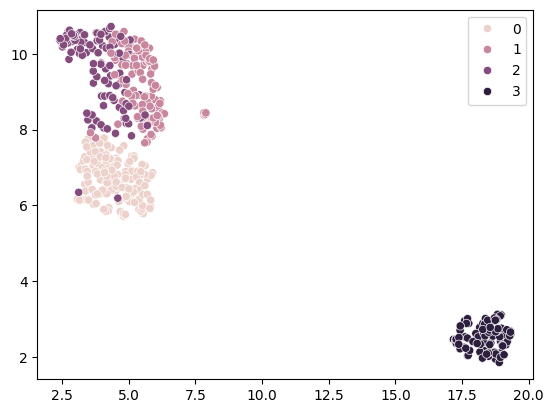

In [30]:
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches_dict[x]).values)
plt.show()

In [31]:
# !pip install combat
from combat.pycombat import pycombat

In [32]:
met_df_corrected = pycombat(met_df.T, clin_df['STUDY'].values).T

Found 4 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


/home/lucija/.local/lib/python3.10/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


In [33]:
umap_result_corrected = umap_model.fit_transform(met_df_corrected)

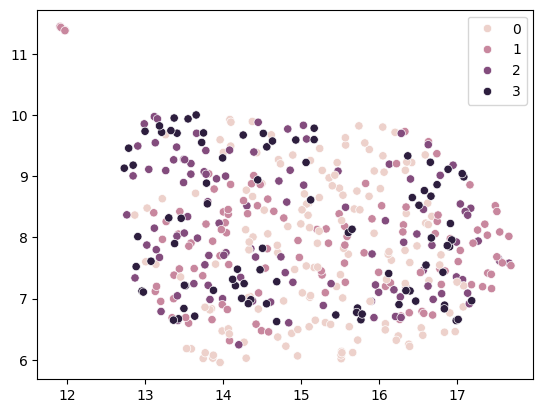

In [34]:
sns.scatterplot(x=umap_result_corrected[:, 0], y=umap_result_corrected[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches_dict[x]).values)
plt.show()

In [38]:
# TODO: analyse outliers

#### selecting patients who do not take aspirin

In [82]:
met_df_corrected.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-08997,-1.146540,-0.966077,-0.919295,-0.762227,0.465931,-0.321215,0.234032,-0.532247,-1.168648,-0.884996,...,-0.965052,-0.431841,-0.017966,-0.782913,0.726504,-0.162807,0.073866,0.280832,2.018347,-0.304122
BAYL-08998,0.477618,-1.337413,0.560910,-0.730947,-0.380736,-0.160774,0.244356,-0.554670,-1.230694,0.303970,...,-0.989859,-0.052013,-0.493338,1.048384,-0.247300,0.127975,0.258025,0.127785,1.356715,-0.353967
BAYL-08999,1.208398,-0.863373,-0.789945,3.097627,0.171950,0.739391,2.078265,1.518396,1.428407,0.044864,...,0.712341,0.205972,-0.130602,-0.084731,-0.284769,-0.077856,0.879550,0.271521,1.196345,-0.455349
BAYL-09000,0.328204,-0.953631,0.689269,0.502983,-0.488073,-0.339551,-0.477938,-0.614491,-0.774790,-0.343972,...,0.135439,-0.783161,0.926692,0.225079,0.828029,-0.083462,-0.969838,-0.318686,-0.295678,-0.205689
BAYL-09001,-0.288785,-0.853366,-0.706585,-0.622198,0.172444,0.589218,-0.808919,-0.773367,-0.856574,-0.623981,...,-0.126365,-0.052013,-0.477724,0.046747,0.038975,-0.892982,0.459034,-0.440672,0.394252,-0.134428


In [83]:
met_df_corrected.index

Index(['BAYL-08997', 'BAYL-08998', 'BAYL-08999', 'BAYL-09000', 'BAYL-09001',
       'BAYL-09002', 'BAYL-09003', 'BAYL-09004', 'BAYL-09005', 'BAYL-09006',
       ...
       's_21944', 's_22832', 's_22842', 's_22997', 's_23003', 's_23077',
       's_23123', 's_22787', 's_23294', 's_73385'],
      dtype='object', length=463)

In [84]:
# pe: preeclampsia (1/0)
# ASA: aspirin (True/False)
target = clin_df[['pe', 'ASA']]
target.index = met_df.index
target

,pe,ASA
BAYL-08997,1.0,True
BAYL-08998,1.0,True
BAYL-08999,0.0,True
BAYL-09000,0.0,True
BAYL-09001,0.0,True
...,...,...
s_23077,0.0,False
s_23123,0.0,False
s_22787,0.0,False
s_23294,0.0,False


In [85]:
df = met_df_corrected.join(target)

In [86]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53267,54840,57714,57716,57718,57719,57720,57754,pe,ASA
BAYL-08997,-1.146540,-0.966077,-0.919295,-0.762227,0.465931,-0.321215,0.234032,-0.532247,-1.168648,-0.884996,...,-0.017966,-0.782913,0.726504,-0.162807,0.073866,0.280832,2.018347,-0.304122,1.0,True
BAYL-08998,0.477618,-1.337413,0.560910,-0.730947,-0.380736,-0.160774,0.244356,-0.554670,-1.230694,0.303970,...,-0.493338,1.048384,-0.247300,0.127975,0.258025,0.127785,1.356715,-0.353967,1.0,True
BAYL-08999,1.208398,-0.863373,-0.789945,3.097627,0.171950,0.739391,2.078265,1.518396,1.428407,0.044864,...,-0.130602,-0.084731,-0.284769,-0.077856,0.879550,0.271521,1.196345,-0.455349,0.0,True
BAYL-09000,0.328204,-0.953631,0.689269,0.502983,-0.488073,-0.339551,-0.477938,-0.614491,-0.774790,-0.343972,...,0.926692,0.225079,0.828029,-0.083462,-0.969838,-0.318686,-0.295678,-0.205689,0.0,True
BAYL-09001,-0.288785,-0.853366,-0.706585,-0.622198,0.172444,0.589218,-0.808919,-0.773367,-0.856574,-0.623981,...,-0.477724,0.046747,0.038975,-0.892982,0.459034,-0.440672,0.394252,-0.134428,0.0,True


In [87]:
df = df[df['ASA'] == False].copy(deep=True)

In [88]:
df.shape

(312, 962)

In [89]:
df.drop(['ASA'], axis = 1, inplace=True)

In [90]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53266,53267,54840,57714,57716,57718,57719,57720,57754,pe
BAYL-09014,0.187718,-0.412404,-0.202174,-0.086940,-0.308921,-0.203724,-0.713629,-0.779126,-1.113414,-0.867635,...,-0.106785,-1.412188,0.302669,-0.361471,-0.173048,-0.611578,-0.480219,-0.813365,-0.482102,0.0
BAYL-09015,0.117036,0.383135,-0.360853,-0.463805,6.005618,4.369395,-1.694578,-0.690654,-0.512814,-0.902014,...,-0.106785,-0.639806,0.050854,-0.294738,0.396971,-0.657563,-0.432487,0.152373,-0.482810,0.0
BAYL-09016,0.328983,-0.352526,0.032265,0.278657,-0.465853,0.347904,-0.919261,-0.611782,-0.401626,-0.738763,...,-0.106785,-0.399783,0.050854,-0.131048,0.353900,-0.724636,0.272656,0.152373,0.024405,0.0
BAYL-09017,0.373233,0.223691,-0.084735,0.469420,-0.298908,0.116556,0.917591,-0.642276,-0.458118,-0.465037,...,-0.106785,-0.905840,0.050854,-0.528665,0.345464,0.399211,0.137868,0.152373,-0.399184,0.0
BAYL-09018,0.103667,0.523858,-0.238637,-1.072156,-0.335935,0.167922,0.033078,0.053965,0.430851,-0.580457,...,-0.403535,-0.138488,0.050854,-0.436052,1.017550,1.103787,0.000842,0.152373,-0.308211,0.0


In [91]:
target = df['pe']
df.drop(['pe'], axis=1, inplace=True)
target

BAYL-09014    0.0
BAYL-09015    0.0
BAYL-09016    0.0
BAYL-09017    0.0
BAYL-09018    0.0
             ... 
s_23077       0.0
s_23123       0.0
s_22787       0.0
s_23294       0.0
s_73385       1.0
Name: pe, Length: 312, dtype: float64

In [92]:
np.bincount(target)

array([215,  97])

In [94]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-09014,0.187718,-0.412404,-0.202174,-0.086940,-0.308921,-0.203724,-0.713629,-0.779126,-1.113414,-0.867635,...,-0.143631,-0.106785,-1.412188,0.302669,-0.361471,-0.173048,-0.611578,-0.480219,-0.813365,-0.482102
BAYL-09015,0.117036,0.383135,-0.360853,-0.463805,6.005618,4.369395,-1.694578,-0.690654,-0.512814,-0.902014,...,-0.166960,-0.106785,-0.639806,0.050854,-0.294738,0.396971,-0.657563,-0.432487,0.152373,-0.482810
BAYL-09016,0.328983,-0.352526,0.032265,0.278657,-0.465853,0.347904,-0.919261,-0.611782,-0.401626,-0.738763,...,0.077195,-0.106785,-0.399783,0.050854,-0.131048,0.353900,-0.724636,0.272656,0.152373,0.024405
BAYL-09017,0.373233,0.223691,-0.084735,0.469420,-0.298908,0.116556,0.917591,-0.642276,-0.458118,-0.465037,...,1.807690,-0.106785,-0.905840,0.050854,-0.528665,0.345464,0.399211,0.137868,0.152373,-0.399184
BAYL-09018,0.103667,0.523858,-0.238637,-1.072156,-0.335935,0.167922,0.033078,0.053965,0.430851,-0.580457,...,-0.359251,-0.403535,-0.138488,0.050854,-0.436052,1.017550,1.103787,0.000842,0.152373,-0.308211


### Classification

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df, target, stratify=target, test_size=0.2)

In [97]:
X_train.shape

(249, 960)

In [98]:
X_test.shape

(63, 960)

In [99]:
scaler = StandardScaler()

In [100]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model = RandomForestClassifier()

In [103]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [106]:
accuracy_score(y_test, y_pred)

0.746031746031746

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83        43
         1.0       0.70      0.35      0.47        20

    accuracy                           0.75        63
   macro avg       0.73      0.64      0.65        63
weighted avg       0.74      0.75      0.72        63



In [108]:
confusion_matrix(y_test, y_pred)

array([[40,  3],
       [13,  7]])

In [109]:
importances = model.feature_importances_

In [110]:
importances.max()

0.012496870721090274

In [111]:
importances.min()

0.0

In [112]:
len([x for x in importances if x == 0])

121